<a href="https://colab.research.google.com/github/bharadwaj213/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

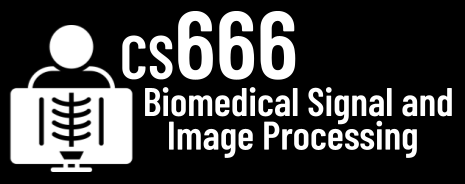
#Assignment 5

In [1]:
# NAME: INTURI SAI BHARADWAJ

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.3 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Use wget to download https://cs666.org/data/ct.zip!
# This is a CT scan of an arm in DICOM format.

In [6]:
# TODO: YOUR CODE
!wget https://cs666.org/data/ct.zip

--2024-04-16 03:50:14--  https://cs666.org/data/ct.zip
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.08s   

2024-04-16 03:50:14 (71.6 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [7]:
# Then use the following snippet to extract the data.

In [8]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [9]:
# 1) Let's explore the data using the Files panel on the left.
# TODO: How many slices are there?

In [10]:
# TODO: 220

In [11]:
# 2) Let's visualize the data with SliceDrop!
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [12]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

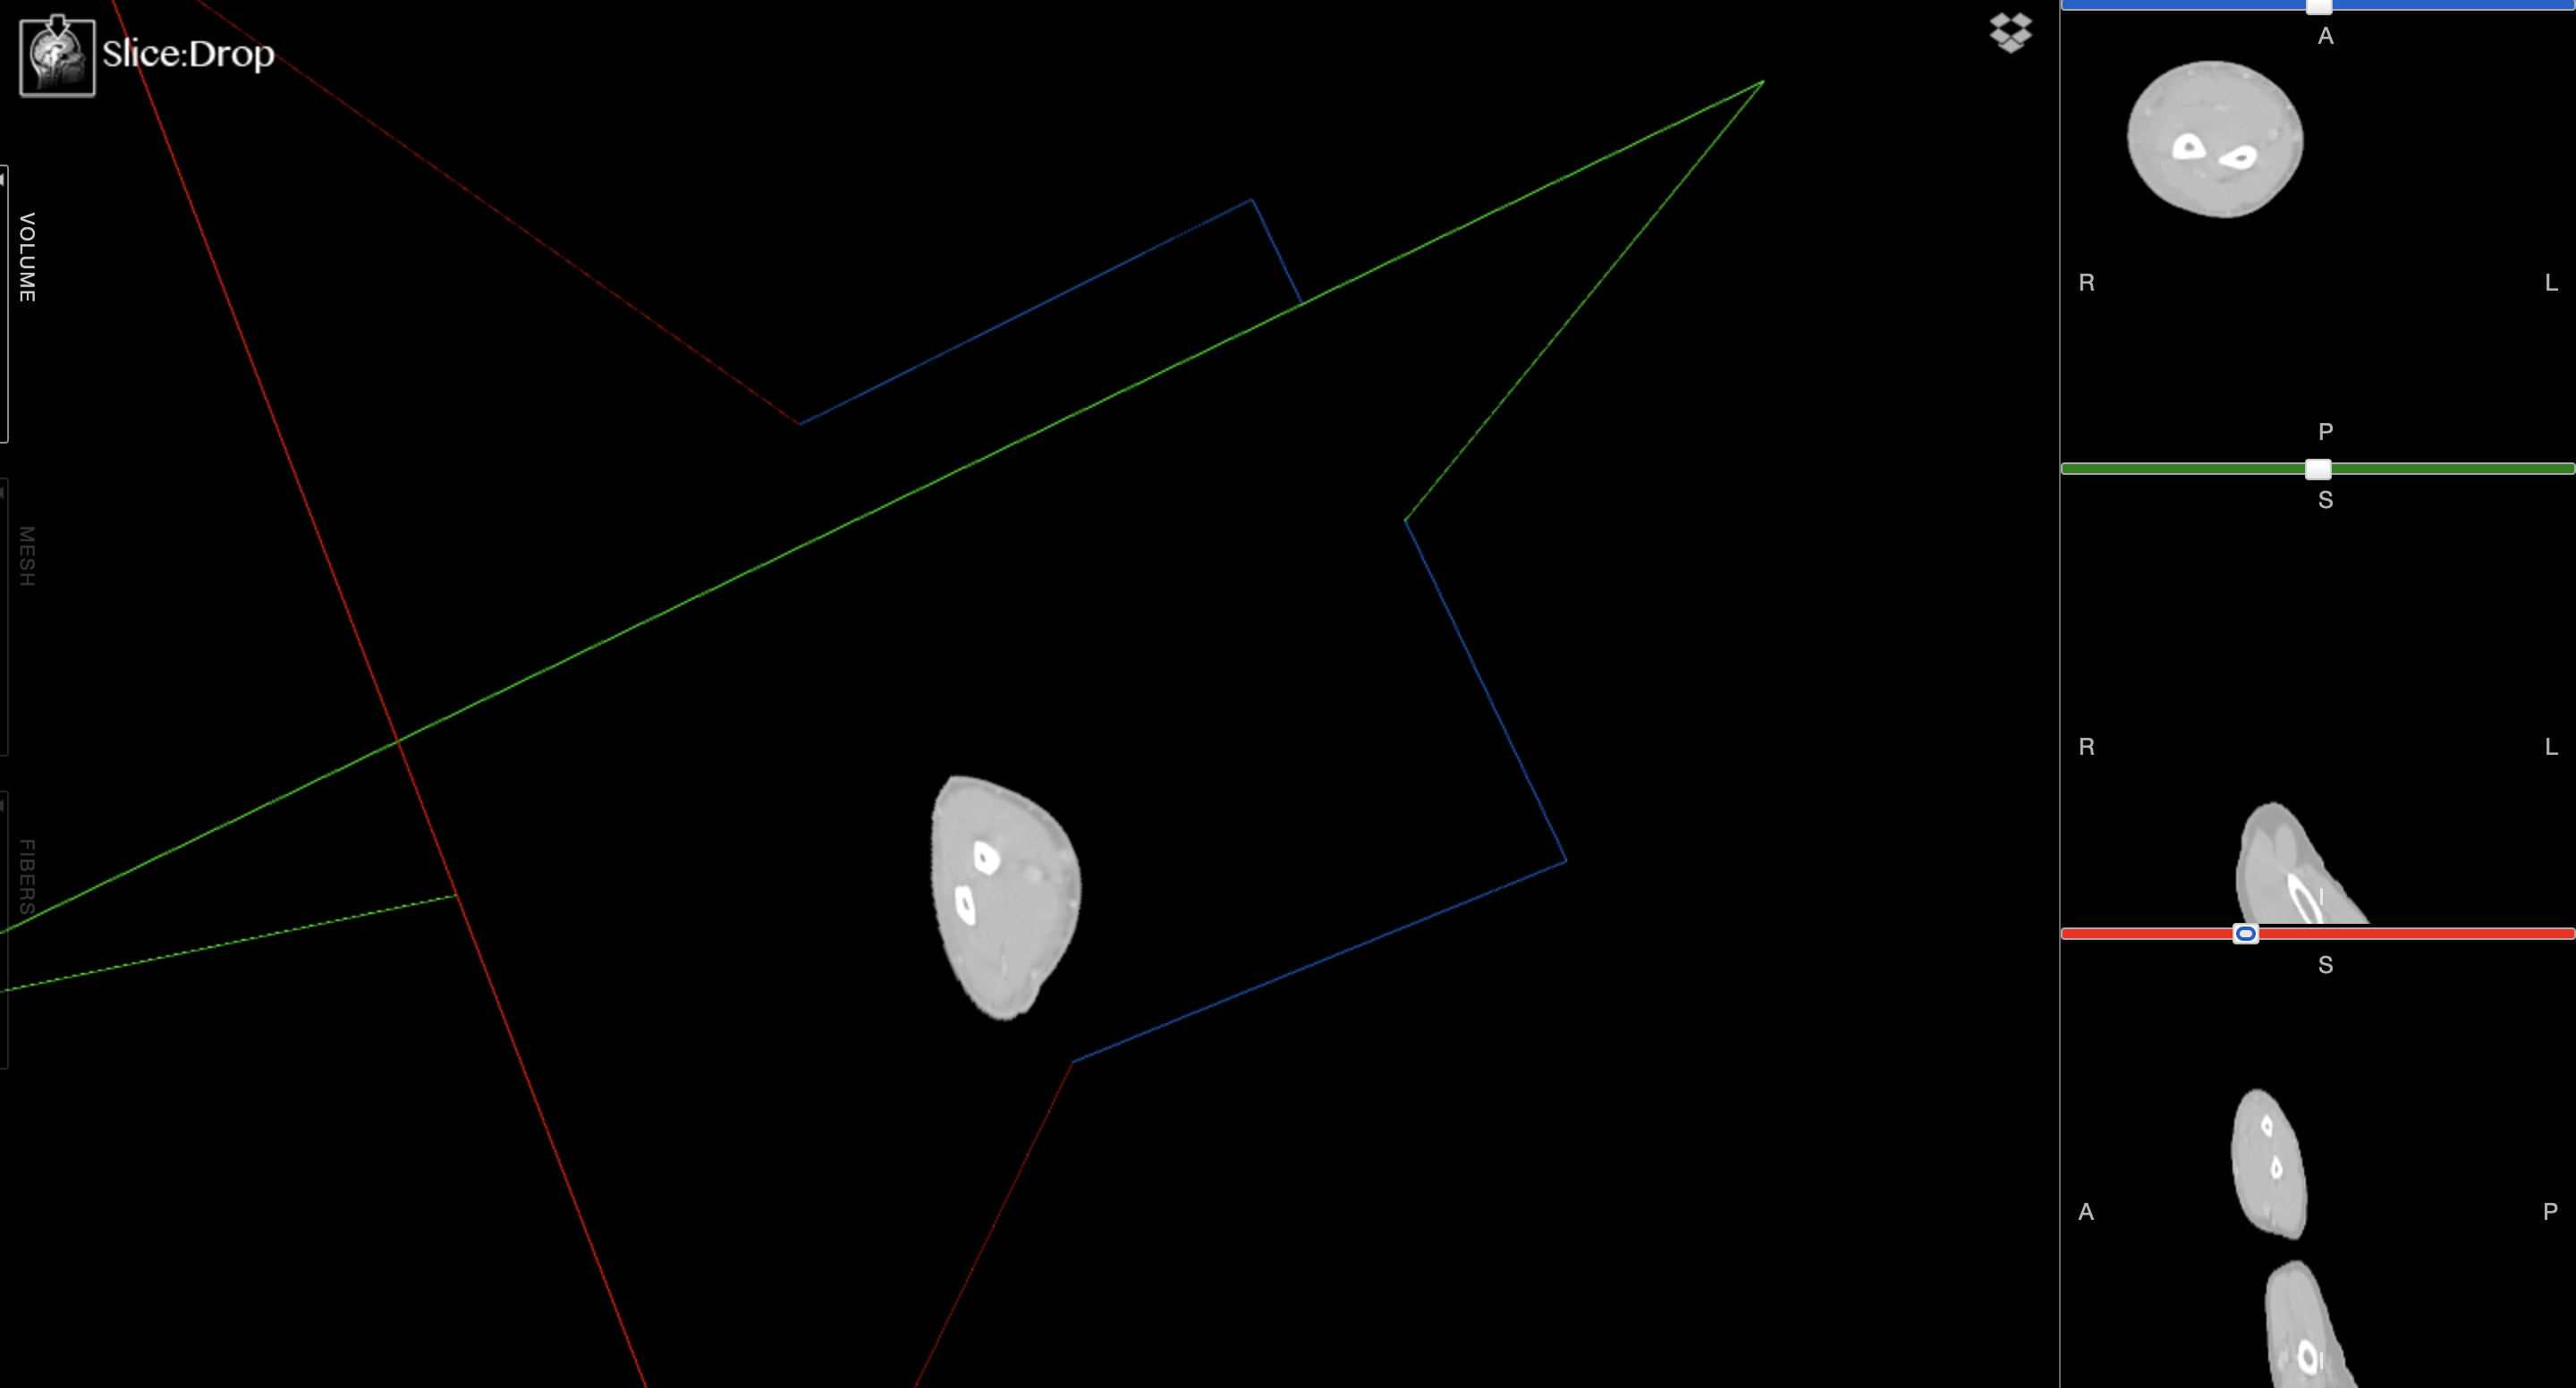

In [13]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [14]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by
# using the Upload image button after double-click.

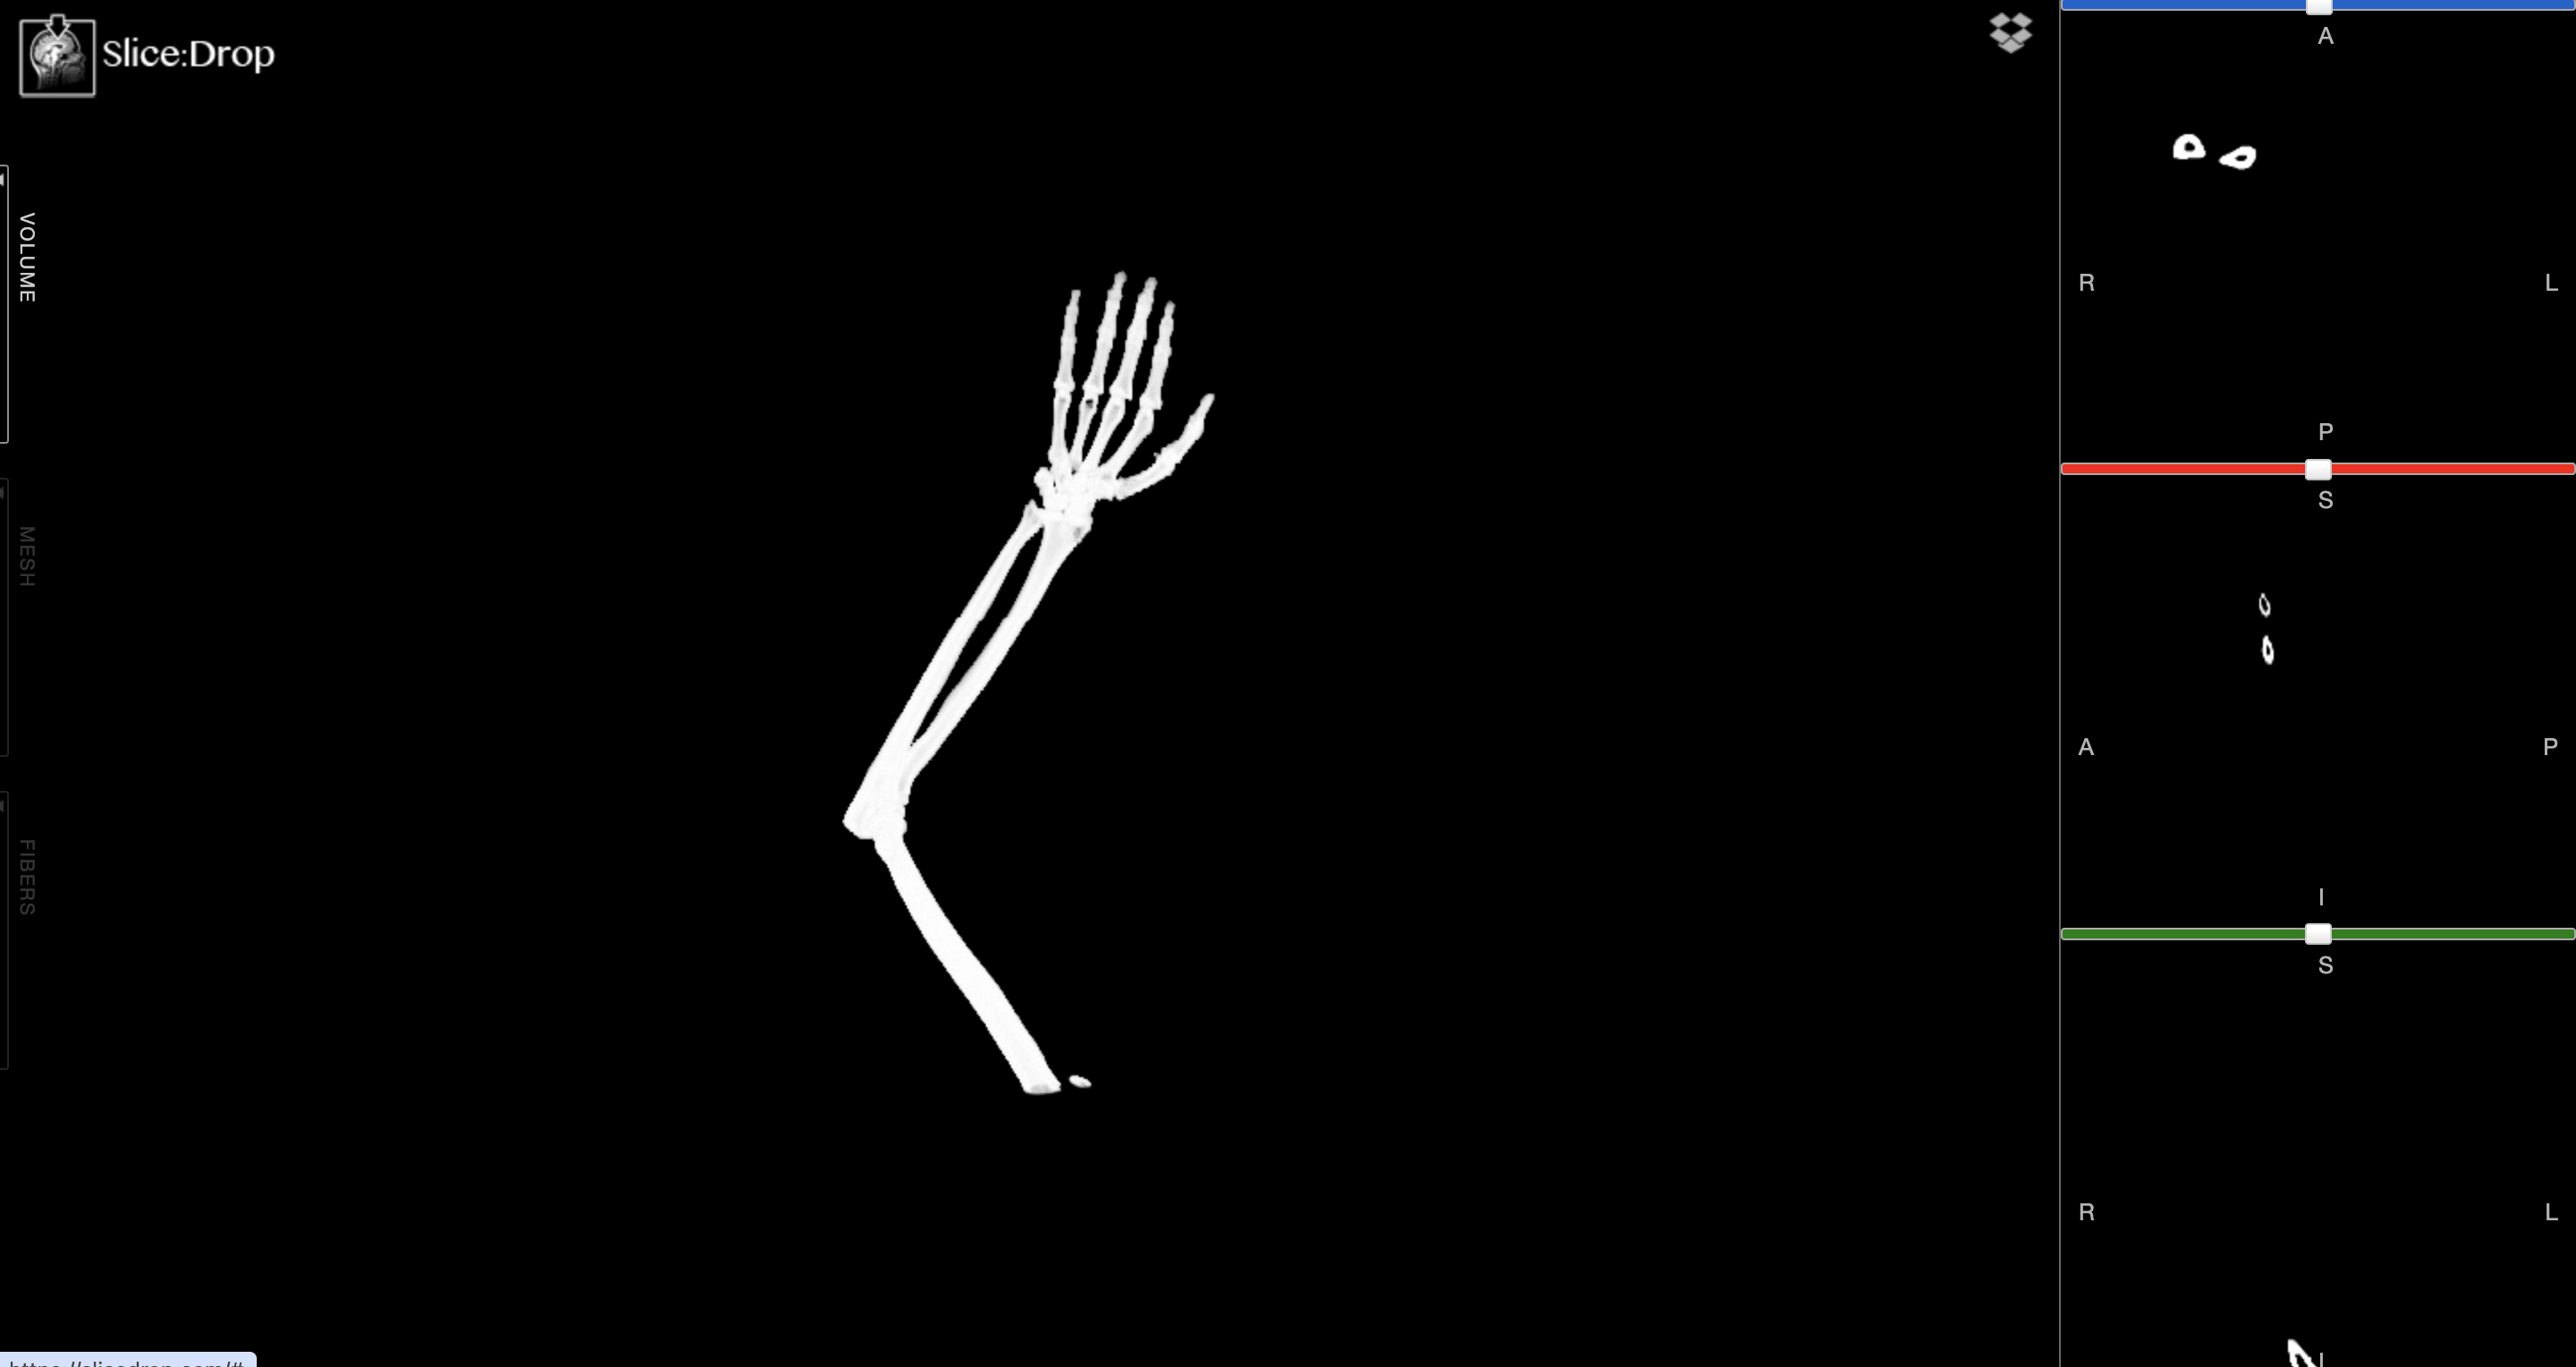

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [15]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [16]:
from pydicom import dcmread

In [17]:
# # TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
# import os;
# listdata = os.listdir("/content/ct")
# listdata.sort();

# first_file = dcmread(os.path.join("/content/ct", listdata[0]))
# num_slices = len(listdata)
# dim_x = int(first_file.Rows)
# dim_y = int(first_file.Columns)
# ct_volume = np.zeros((dim_x, dim_y, num_slices), dtype=np.float32)

# for i, file_name in enumerate(listdata):
#     ds = dcmread(os.path.join("/content/ct", file_name))
#     ct_slice = ds.pixel_array#.astype(np.float32)
#     ct_volume[:, :, i] = ct_slice


In [18]:
import os


listdata = os.listdir("/content/ct")
listdata.sort()

ctimagevolume = None

for file_name in listdata:
    ds = dcmread(os.path.join("/content/ct", file_name))
    ct_slice = ds.pixel_array.astype(np.float32)
    if ctimagevolume is None:
        ctimagevolume = ct_slice[np.newaxis, ...]
    else:
        ctimagevolume = np.concatenate((ctimagevolume, ct_slice[np.newaxis, ...]), axis=0)



In [19]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

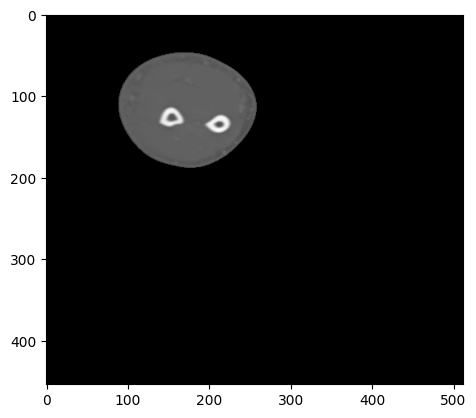

In [20]:
# TODO: YOUR CODE FOR AXIAL

plt.imshow(ctimagevolume[100,:, :], cmap='gray')


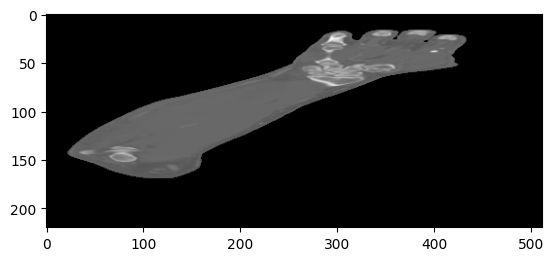

In [21]:
# TODO: YOUR CODE FOR SAGITTAL

plt.imshow(ctimagevolume[:,100, :], cmap='gray')


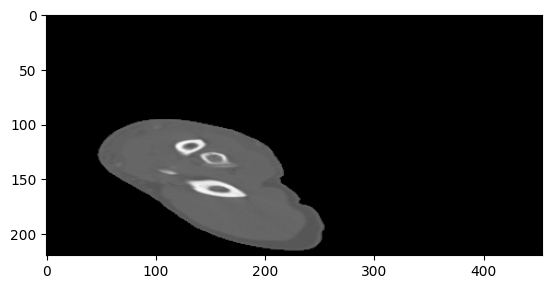

In [22]:
# TODO: YOUR CODE FOR CORONAL

plt.imshow(ctimagevolume[: ,:,100], cmap='gray')


**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [23]:
# We will now enhance the visualization from above by performing
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [24]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window center 30
Window width 410


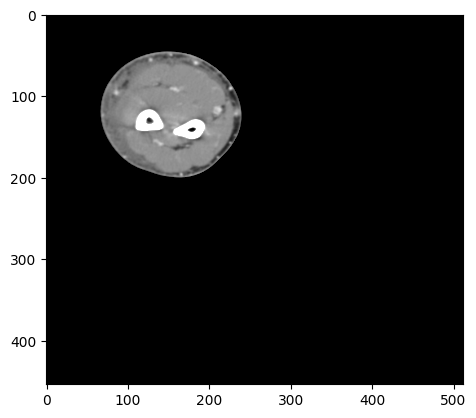

In [25]:
# TODO: YOUR CODE
file = dcmread(os.path.join("/content/ct", listdata[0]))
window_center = file[(0x0028, 0x1050)].value
window_width = file[(0x0028, 0x1051)].value
rescale_intercept = file[(0x0028, 0x1052)].value

print("Window center",window_center)
print("Window width",window_width)


slice_num = 110
slice_data = ctimagevolume[slice_num] + rescale_intercept + file.RescaleSlope

vmin = window_center - window_width/2
vmax = window_center + window_width/2

plt.imshow(slice_data, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


In [26]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

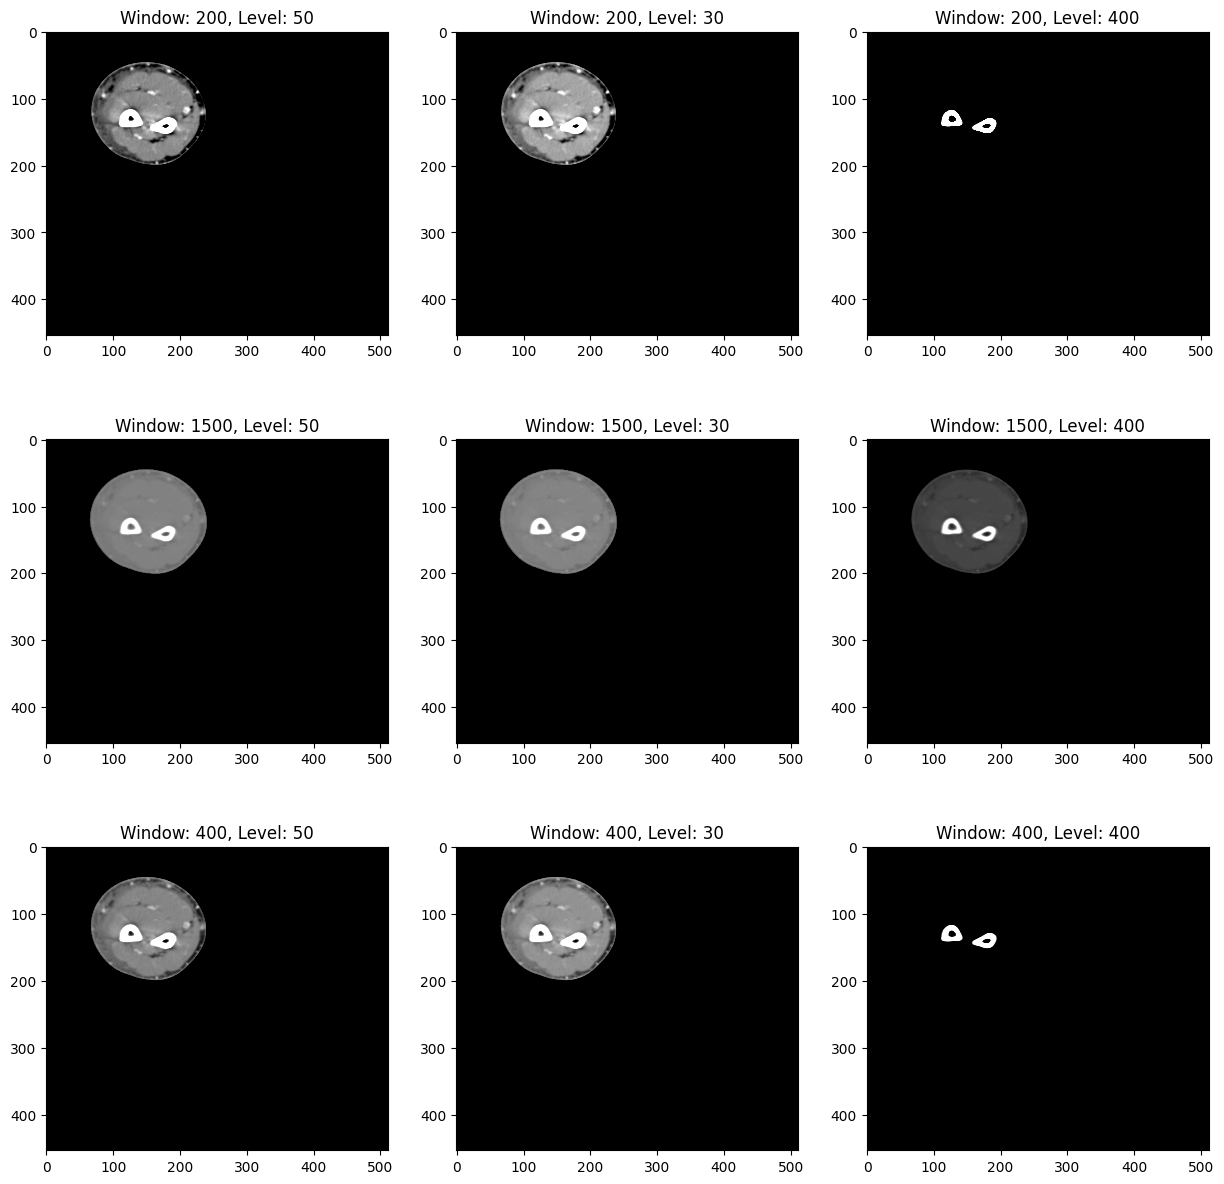

In [27]:
# TODO: YOUR CODE


custom_windows = [400,200, 1500]
custom_levels = [50,30, 400]

slice_num = 110
slice_data = ctimagevolume[slice_num] + rescale_intercept + file.RescaleSlope

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i,window in enumerate(custom_windows):
    for j,level in enumerate(custom_levels):
        vmin = level - window/2
        vmax = level + window/2

        axs[i-1, j].imshow(slice_data, cmap='gray', vmin=vmin, vmax=vmax)
        axs[i-1, j].set_title(f"Window: {window}, Level: {level}")


In [28]:
# Which values make sense and why?

In [29]:
# TODO: YOUR ANSWER

In [30]:
#400,30  and  200,30 seems to have better clarity with  good contrast and detail. The appropriat may depend on the preferences of the viewer or the specific diagnostic task at hand

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [31]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

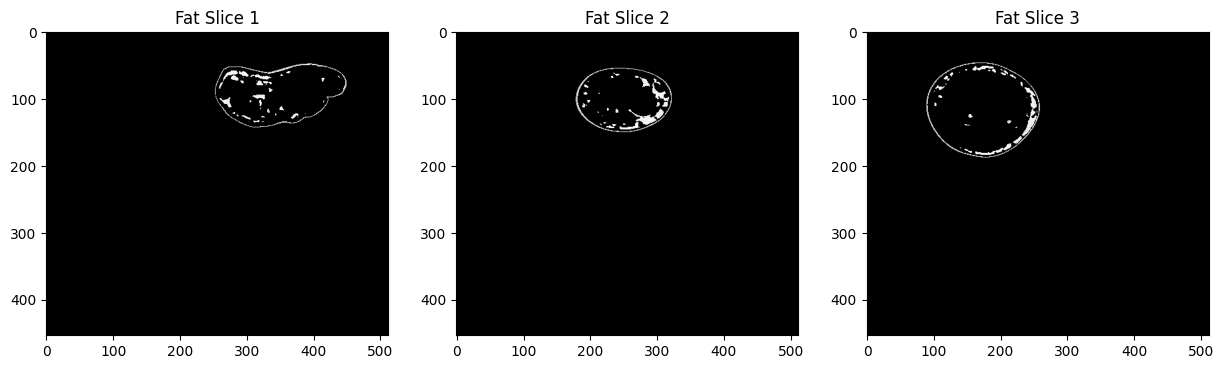

In [32]:
# TODO: YOUR CODE TO SEGMENT FAT

fat_range = (-50, 1000)

fat_mask = ctimagevolume.copy()
fat_mask[fat_mask < fat_range[0]] = 0
fat_mask[fat_mask > fat_range[1]] = 0
fat_mask = np.int16(fat_mask)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(fat_mask[50 + i * 25, :, :], cmap='gray')
    ax.set_title(f"Fat Slice {i+1}")

plt.show()

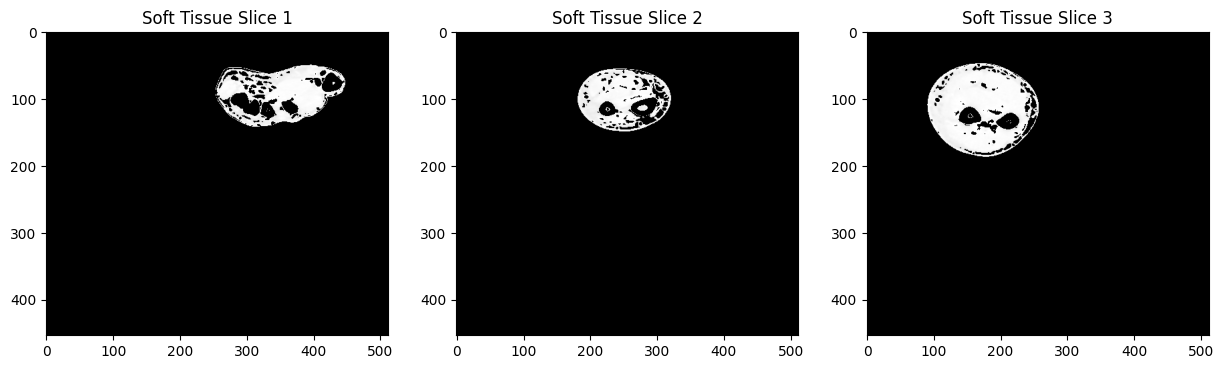

In [33]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

tissue_range = (1000, 1100)

tissue_mask = ctimagevolume.copy()
tissue_mask[tissue_mask < tissue_range[0]] = 0
tissue_mask[tissue_mask > tissue_range[1]] = 0
tissue_mask = np.int16(tissue_mask)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(tissue_mask[50 + i * 25, :, :], cmap='gray')
    ax.set_title(f"Soft Tissue Slice {i+1}")

plt.show()


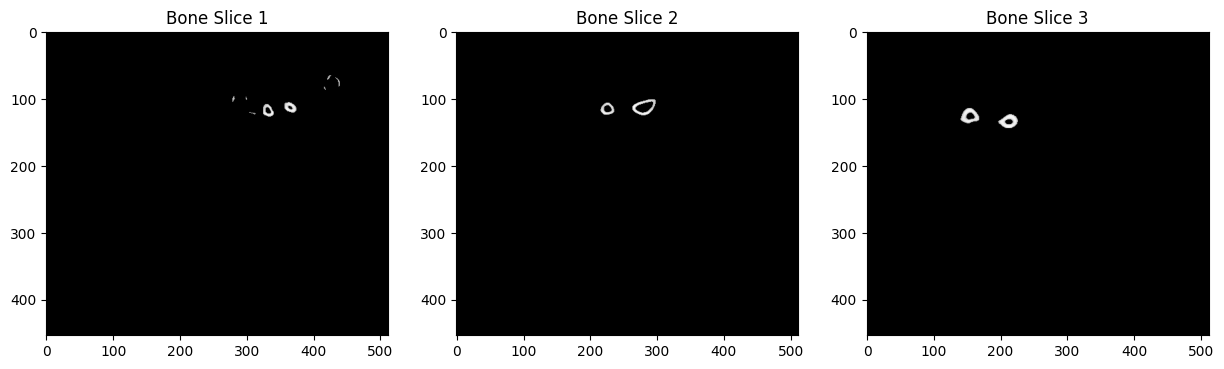

In [34]:
# TODO: YOUR CODE TO SEGMENT BONES

bone_range = (1800, 2900)

bone_mask = ctimagevolume.copy()
bone_mask[bone_mask < bone_range[0]] = 0
bone_mask[bone_mask > bone_range[1]] = 0
bone_mask = np.int16(bone_mask)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(bone_mask[50 + i * 25, :, :], cmap='gray')
    ax.set_title(f"Bone Slice {i+1}")

plt.show()

In [35]:
# Are the segmentations good?

In [36]:
# TODO: YOUR ANSWER

In [37]:
#YES the segmenations are good for these HU values

In [38]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""